<a href="https://colab.research.google.com/github/SangHee33/Sanghee2/blob/main/%EC%BA%90%EA%B8%80_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 분류: 의류 이미지 분류

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


##패션 MNIST 데이터셋 임포트하기
- 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용
- 이미지는 해상도(28x28 픽셀)가 낮음


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이
- 레이블(label)은 0에서 9까지의 정수 배열


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

##데이터 전처리

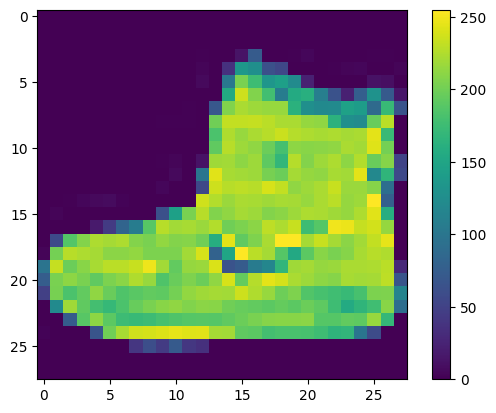

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# 범위를 0~1로 조정
train_images = train_images / 255.0

test_images = test_images / 255.0

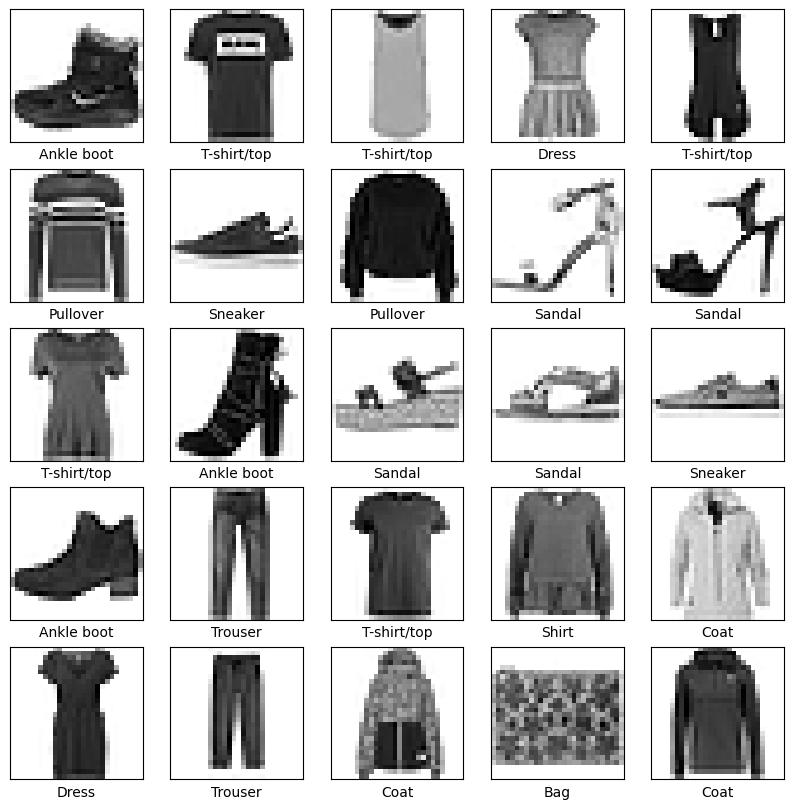

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##모델 구성
###층 설정
- 신경망의 기본 빌딩 블록은 레이어
 - 레이어는 레이어에 공급된 데이터로부터 표현을 추출
- 대부분 딥러닝은 간단한 층을 연결하여 구성
- tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 두 개의 tf.keras.layers.Dense 층(밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층)이 연속되어 연결
- 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가짐
- 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층, 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1
- 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
###모델 컴파일
- 손실 함수 : 훈련 중 모델이 얼마나 정확한지 측정
 - 모델을 올바른 방향으로 조정하려면 이 함수를 최소화
- 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트
- 메트릭 : 훈련 및 테스트 단계를 모니터링하는 데 사용
 - 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###모델 훈련
1. 훈련 데이터를 모델에 주입(이 예에서는 train_images와 train_labels 배열)
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦(이 예에서는 test_images 배열)
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

####모델 피드


In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4974 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3774 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3369 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3119 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2948 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2788 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2670 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2587 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2460 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

####정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3340 - accuracy: 0.8855 - 658ms/epoch - 2ms/step

Test accuracy: 0.8855000138282776


-> 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음 -> 과대적합 때문
####예측하기
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행
- 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [20]:
# 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)
predictions[0]

array([1.7750936e-06, 6.1154988e-09, 1.3949933e-07, 8.2490370e-10,
       3.0005998e-07, 2.1424904e-03, 1.7969319e-07, 5.7339487e-03,
       7.8460189e-09, 9.9212128e-01], dtype=float32)

In [21]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

-> 예측값과 라벨값이 일치함

In [23]:
# 10개 클래스에 대한 예측
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

####예측 확인

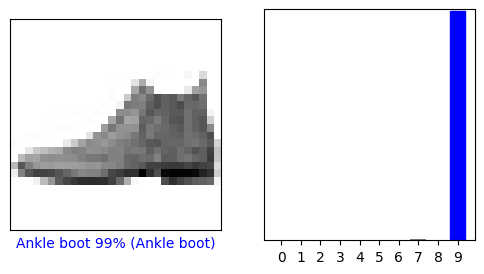

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

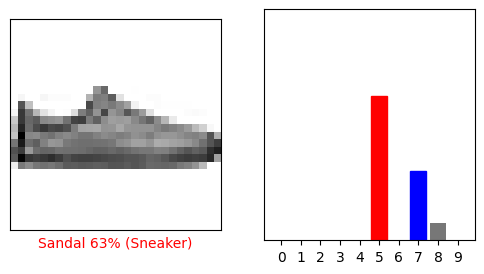

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

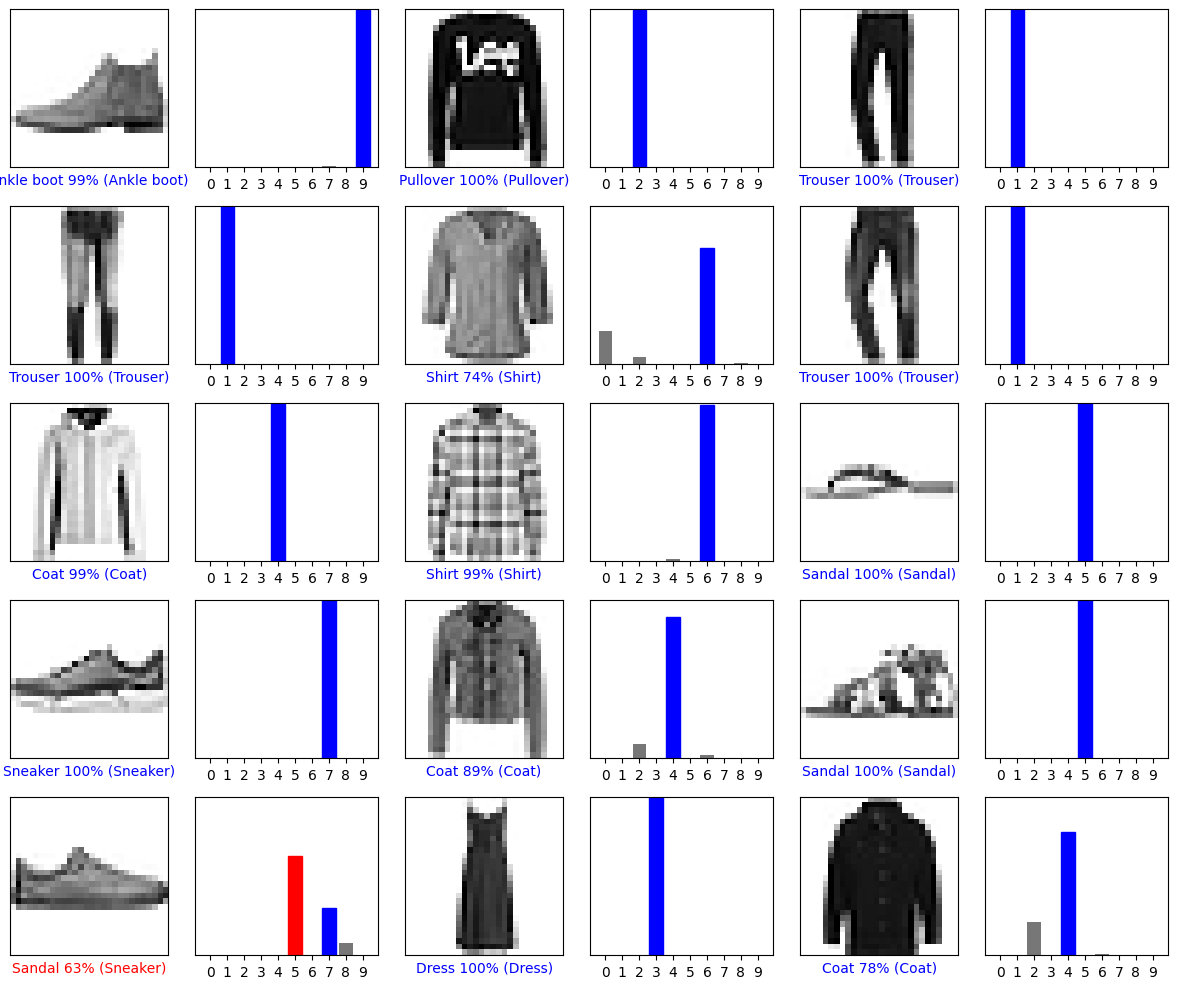

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####훈련된 모델 사용하기

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 89ms/step
[[5.2642841e-05 8.2498196e-13 9.9591982e-01 4.2723260e-12 2.5008605e-03
  5.5405913e-16 1.5266539e-03 1.6687601e-17 3.1569060e-11 1.1754881e-14]]


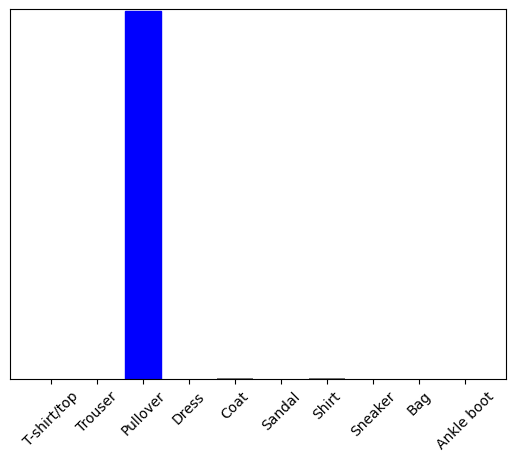

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2